<a href="https://colab.research.google.com/github/ssnelgrove314/ft_sommelier/blob/master/ft_sommelier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# V.1 Exploring The Green Reds

##a)
Write a function that will plot a scatterplot matrix of your red wine data. Your function should plot wines with quality over some “good_threshold” as one color, and wines below some “bad_threshold” as another. Your plotting function should have the option to save a .png of your plots. Here’s an example function definition:
```python
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
  pass
```
**Don’t use the scatter_matrix() method in pandas.plotting!
Learning how to modify plots with just matplotlib will be extremely helpful
when creating custom plots in the future.**

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

def get_csv_from_github():
  url = 'https://raw.githubusercontent.com/ssnelgrove314/ft_sommelier/master/winequality-red.csv'
  df1 = pd.read_csv(url, sep=';')
  return df1

def plot_scatter_matrix(wine_data, good_thresh, bad_thresh, save_plot=False):
  #Determines the good and the bad thresholds and subsets the data so it only contains those.
  good = wine_data.quality >= good_thresh
  bad = wine_data.quality <= bad_thresh
  #The properly subsetted data
  good_data = wine_data[good]
  bad_data = wine_data[bad]
  
  fig = plt.figure(figsize=[20, 20])
  
  for x in range (1, wine_data.shape[1]):
    for y in range (1, wine_data.shape[1]):
      axes = fig.add_subplot(
          wine_data.shape[1] - 1,
          wine_data.shape[1] - 1,
          ((x - 1) * (wine_data.shape[1] - 1) + y)
      )
      if(x == y):
        name = good_data.columns[x - 1];
        axes.text(
            .50,
            .50, 
            name,
            size = 'xx-large',
            horizontalalignment='center',
            verticalalignment='center',
            transform=axes.transAxes
        )
      else:
        gx = good_data.iloc[:, x - 1];
        gy = good_data.iloc[:, y - 1];
        bx = bad_data.iloc[:, x - 1];
        by = bad_data.iloc[:, y - 1];
        axes.scatter(
            gx, 
            gy, 
            color=["blue"],
            marker=",",
            s=2
        )
        axes.scatter(
            bx, 
            by, 
            color=["red"],
            marker=",",
            s=2
        )
      axes.get_xaxis().set_visible(False)
      axes.get_yaxis().set_visible(False)
      
  fig.subplots_adjust(wspace = 0, hspace=0)
  if save_plot == True:
    saved_fig = plt.savefig('plot_scatter_matrix.png')
    return save_fig
  else:
    plt.show()

In [0]:

df1['lable'] = 
df1

ValueError: ignored

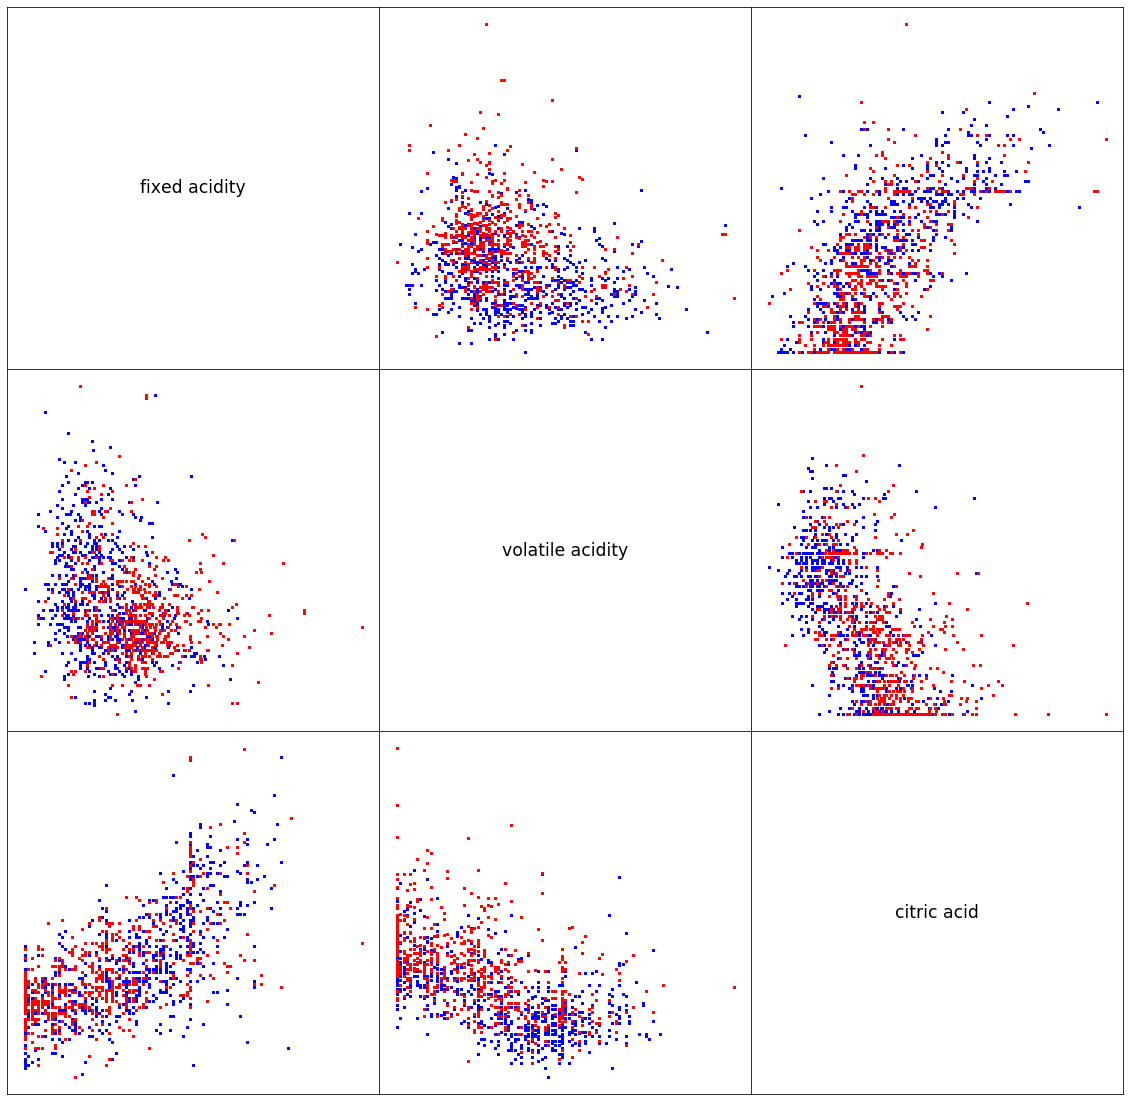

In [0]:
df1 = get_csv_from_github()
plot_scatter_matrix(df1[["fixed acidity", "volatile acidity", "citric acid", "quality"]], 6, 5)

## b)
Now that you’ve had a chance to analyze different chemical factors in red wines and their relationship with high scores (8 or higher) and low scores (3 or lower), which factors do you think will be most useful to your perceptron for distinguishing high quality vs. low quality wines? Why?

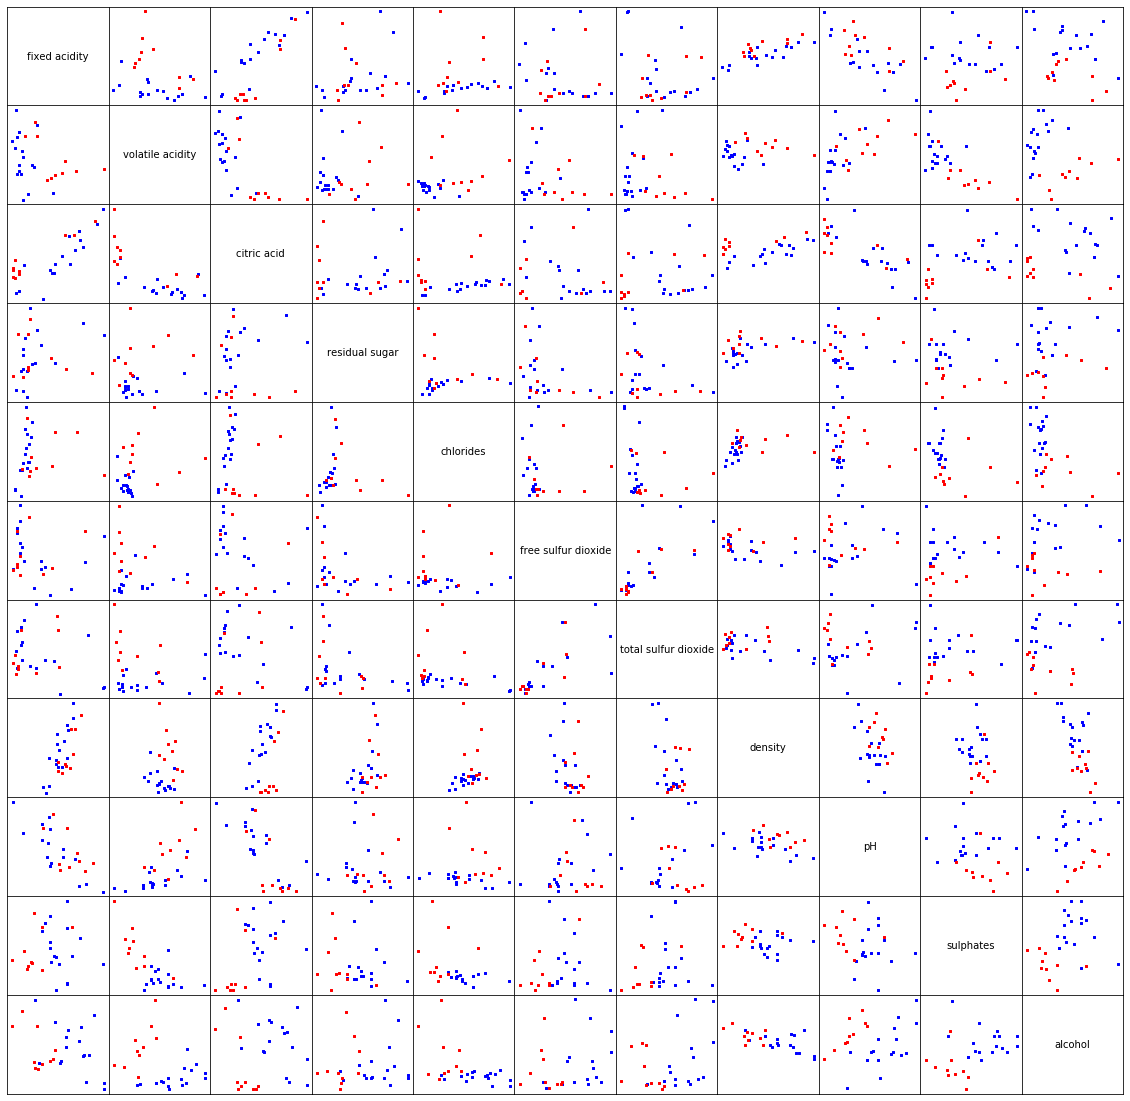

In [0]:
df = get_csv_from_github()
plot_scatter_matrix(df, 8, 3)

**Which factors do you think will be most useful to your perceptron for distinguishing high quality vs. low quality wines? Why?**

b) The most important factors are alcohol and ph because they seem to have the strongest linearly positive relationship.

#V.2 Learning To Perceptron

## a) Implement a perceptron that: 

* Has randomly initialized weights and bias
* Uses the Rosenblatt perceptron learning rule (with changeable learning rate)
* Utilizes the heaviside step activation fuction (discrete version)




In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import random as rand

class Perceptron(object):
  def __init__(self, wine_data, good_thresh=8, bad_thresh=3, threshold = 0.0, columns=["pH", "alcohol"]):
    self.current_epoch = 0
    self.threshold = threshold
    self.wine_data = wine_data
    self.wines, self.labels = self.get_good_bad_threshold_data(wine_data, good_thresh, bad_thresh, columns)
    self.num_of_inputs = self.wines.shape[1]
    self.weights, self.bias = [rand.uniform(-1.0, 1.0) for x in range(0, self.num_of_inputs)], rand.uniform(-1.0, 1.0)

  def get_good_bad_threshold_data(self, wine_data, good_thresh, bad_thresh, columns=["pH", "alcohol"]):
    good = wine_data.quality >= good_thresh
    bad = wine_data.quality <= bad_thresh
    good_wine = wine_data[good]
    bad_wine = wine_data[bad]
    wine = [good_wine, bad_wine]
    ret = pd.concat(wine)
    labels = ret.quality.map(lambda x: 1.0 if x >= good_thresh else 0.0)
    return ret[columns], labels
  
  def heaviside_step_function(self, activation):
    return 1.0 if activation >= self.threshold else 0.0
  
  def predict(self, inputs):
    #Heaviside step activation fuction discrete version
    activation = self.bias
    #dot product
    for i in range(len(inputs)):
      activation += self.weights[i] * inputs[i]
    return self.heaviside_step_function(activation)

## b) 
You’ll need to implement a function to train your perceptron. Your training function should take in your red wine data as a parameter and should:
* Have a way to specify number of training epochs
* Train your perceptron until it makes no errors, if training epochs is set to 0, 
* Have a way to specify learning rate.
* Return a list of python tuples containing (performance):
```
return [(current_epoch, num_errors_at_epoch_end, [array_of_weights], bias), . . . ]
```

What should your ‘training’ data be? For now, focus on training your perceptron on 2 chemical factors (for example, alcohol and pH) and only use wines with a score of 8 or higher and wines with a score of 3 or lower.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import random as rand
import time

class Perceptron(object):
  def __init__(self, wine_data, good_thresh=8, bad_thresh=3, threshold = 0.0, columns=["pH", "alcohol"]):
    self.columns = columns
    self.current_epoch = 0
    self.threshold = threshold
    self.wine_data = wine_data
    self.wines, self.labels = self.get_good_bad_threshold_data(wine_data, good_thresh, bad_thresh, columns)
    self.num_of_inputs = self.wines.shape[1]
    self.weights, self.bias = [rand.uniform(-1.0, 1.0) for x in range(0, self.num_of_inputs)], rand.uniform(-1.0, 1.0)
    self.ret_vals = None

  def get_good_bad_threshold_data(self, wine_data, good_thresh, bad_thresh, columns=["pH", "alcohol"]):
    rand.seed(time.time())
    good = wine_data.quality >= good_thresh
    bad = wine_data.quality <= bad_thresh
    good_wine = wine_data[good]
    bad_wine = wine_data[bad]
    wine = [good_wine, bad_wine]
    ret = pd.concat(wine)
    labels = ret.quality.map(lambda x: 1.0 if x >= good_thresh else 0.0)
    return ret[columns], labels
  
  def heaviside_step_function(self, activation):
    return 1.0 if activation >= self.threshold else 0.0
  
  def predict(self, inputs):
    #Heaviside step activation fuction discrete version
    activation = self.bias
    #dot product
    for i in range(len(inputs)):
      activation += self.weights[i] * inputs[i]
    return self.heaviside_step_function(activation)
  
  def train(self, epochs=100, learning_rate=1):
    ret = []
    if epochs == 0:
      while (True):
        self.current_epoch += 1
        sum_error = 0.0
        for i in range(len(self.wines)):
          prediction = self.predict(self.wines.iloc[i])
          error = self.labels.iloc[i] - prediction
          sum_error += error**2
          self.bias = self.bias + learning_rate * error
          for j in range(len(self.wines.iloc[i])):
            self.weights[j] = self.weights[j] + learning_rate * error * self.wines.iloc[i][j]
        ret.append((int(self.current_epoch), int(sum_error), self.weights, self.bias))
        if sum_error == 0:
          self.ret_vals = ret
          return ret
    else:
      for current in range(epochs):
        self.current_epoch += 1
        sum_error = 0.0
        for i in range(len(self.wines)):
          prediction = self.predict(self.wines.iloc[i])
          error = self.labels.iloc[i] - prediction
          sum_error += error**2
          self.bias = self.bias + learning_rate * error
          for j in range(len(self.wines.iloc[i])):
            self.weights[j] = self.weights[j] + learning_rate * error * self.wines.iloc[i][j]
        ret.append((int(self.current_epoch), int(sum_error), self.weights, self.bias))
      self.ret_vals = ret
      return ret


In [0]:
url = 'https://raw.githubusercontent.com/ssnelgrove314/ft_sommelier/master/winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')
percp = Perceptron(wine_data)
ret_vals = percp.train(0, .1)
print (ret_vals[0])

(1, 3, [-59.331540632063614, 14.804753260717785], -0.1876918865652927)


In [0]:
print(ret_vals[-1])

(7667, 0, [-59.34107631393928, 14.799053106636649], 43.70226748176037)


## c)
Now that you have a perceptron, a way to train your perceptron, and some data, you need a way to confirm that your perceptron actually works. Write a function that will take the output of your perceptron training function and your red wine data and generate two plots in one figure:
* The first plot should plot the number of errors your perceptron made as a function of epoch. Be careful with how you calculate errors!
* The second plot should plot the decision boundary of your perceptron and also show ‘good’ and ‘bad’ wine data points on the final training epoch. This second plot should also shade ‘good’ and ‘bad’ areas!
* Your function should allow the user to specify a specific epoch and see what the decision boundary of the perceptron was on that epoch. If a negative epoch is given, cause the plots to show the last epoch.

In [0]:
import math
x = sum([x*x for x in [1,2,3]])
print(x)

14


In [0]:
def find_min(data):
  ret = data[0]
  for val in data.values:
    if val < ret:
      ret = val
  return ret


def find_max(data):
  ret = data[0]
  for val in data.values:
    if val > ret:
      ret = val
  return ret

def find_mean(data):
  return (sum(data) / len(data))


def plot_errors_as_function_of_epoch(performance, fig):
  errors = []
  epochs = []
  for t in performance:
    errors.append(t[1])
    epochs.append(t[0])
  errors_epoch = fig.add_subplot(121)
  errors_epoch.plot(epochs, errors)
  errors_epoch.set_title("Errors as a function of epoch")
  errors_epoch.set_xlabel("epoch")
  errors_epoch.set_ylabel("classification errors")  

def plot_decision_boundry(performance, wine_data, good_thresh, bad_thresh, epoch, fig):
#   print(performance[epoch])
  last_tup = performance[epoch]
  
  good_wine = wine_data[(wine_data.quality >= good_thresh)]
  bad_wine = wine_data[(wine_data.quality <= bad_thresh)]
  
  gx = good_wine[wine_data.columns[0]]
  gy = good_wine[wine_data.columns[1]]
  
  bx = bad_wine[wine_data.columns[0]]
  by = bad_wine[wine_data.columns[1]]
  
  x_min = find_min(wine_data[wine_data.columns[0]])
  x_max = find_max(wine_data[wine_data.columns[0]])
  y_min = find_min(wine_data[wine_data.columns[1]])
  y_max = find_max(wine_data[wine_data.columns[1]])

  bias = last_tup[3]
  weights = last_tup[2]
  
  y = [0] * 101
  x = [0] * 101
  
  slope = -(bias/weights[1])/(bias/weights[0])
  intercept = -(bias/weights[1])
  k = 0
  for i in range(101):
    x[i] = k + x_min
    y[i] = slope * x[i] + intercept
    k += (x_max - x_min) / 100
  
  axes = fig.add_subplot(122)
  axes.plot(
      x, 
      y, 
      label="Decision Boundry",
      color="black"
  )
  axes.axis([x_min, x_max, y_min, y_max])
  axes.set_xlabel(wine_data.columns[0])
  axes.set_ylabel(wine_data.columns[1])
  axes.fill_between(
      x,
      y,
      y_min -2,
      where=y>y_min-2,
      color="blue",
      alpha=.4
  )
  axes.fill_between(
      x,
      y,
      y_max + 2,
      where=y<y_max+2,
      color="red",
      alpha=.4
  )
  axes.scatter(
      gx,
      gy,
      color="red"
  )
  axes.scatter(
      bx,
      by,
      color="blue"
  )


def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
  fig = plt.figure(figsize=(20,5))
  plot_errors_as_function_of_epoch(performance, fig)
  plot_decision_boundry(performance, wine_data, good_thresh, bad_thresh, epoch, fig)
  plt.show()
  if (save_plot == True):
    return plt.savefig('plot_performance.png')


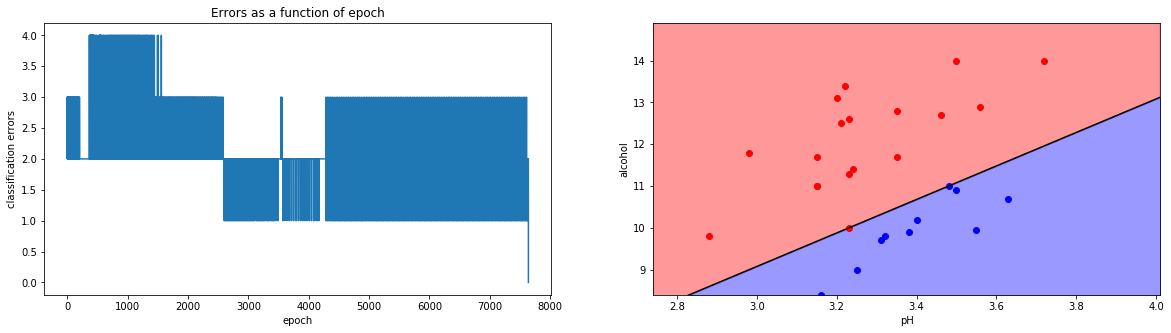

In [0]:
wine_data = percp.wine_data[["pH", "alcohol", "quality"]]
# wine_data[wine_data.columns[0]]
plot_performance(ret_vals, percp.wine_data[["pH", "alcohol", "quality"]], 8, 3, -1, False)

## d)
Your perceptron appears to work...but why is it taking so many epochs to train? Maybe you can modify the red wine data to help the perceptron learn more quickly? **Use the function you just created in part c) to plot and verify that your perceptron is learning more efficiently!**
```
**FEATURE SCALING**
```

In [0]:
wine_data = get_csv_from_github()

#TODO: Change perceptron to use column names instead of iloc/loc

NameError: ignored

In [0]:
import math

def find_mean(data):
  return (sum(data) / len(data))

def standard_deviation(row):
  sq = []
  mean = find_mean(row)
  for x in row:
    sq.append((x - mean)**2)
  return math.sqrt(find_mean(sq))
  

def standardization(wines):
  for row in wines:
    if (row == "quality"):
      break;
    std_dev = standard_deviation(wines[row])
    mean = find_mean(wines[row])
    for x in range(len(wines[row])):
      wines.at[x, row] = ((wines[row].iloc[x] - mean) / std_dev)
  return wines

# wine_data.at[123, 'quality']
winedata = wine_data[["pH", "alcohol", "quality"]]
wines = standardization(winedata)
# print(wine_data1)
percp = Perceptron(wines)
ret = percp.train(0, 0.1)
plot_performance(ret, percp.wine_data[["pH", "alcohol"]], 8, 3, -1, False)

    
    
  

NameError: ignored

# V.3 My Fair ADALINE
Adaptive Linear Neurons

##a)
Encouraged by the results of your perceptron, you decide to see if you can use it to
distinguish between wines with a score of 4 and lower, and wines with a score of 7 and higher. Feeling confident, you decide to let the perceptron train until it can find the best decision boundary.
Marvin notices and chides you for torturing your perceptron. Why?
You decide to upgrade your perceptron to handle this harder classification task. You’ve heard a bit about the gradient descent technique and also about ADALINE, maybe these will do the trick?

**Gradient descent, know it, love it!**

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import random as rand
import time
import math

def get_csv_from_github():
  url = 'https://raw.githubusercontent.com/ssnelgrove314/ft_sommelier/master/winequality-red.csv'
  df1 = pd.read_csv(url, sep=';')
  return df1

def dot_product(inputs, second):
  ret = 0
  for x in range(inputs.shape[1]):
    ret = ret + inputs.iloc[x].sum() * second[x]
  return ret

def standardization(wines):
    def find_mean(data):
      return (sum(data) / len(data))

    def standard_deviation(row):
      sq = []
      mean = find_mean(row)
      for x in row:
        sq.append((x - mean)**2)
      return math.sqrt(find_mean(sq))

    for row in wines:
      if (row == "quality"):
        break;
      std_dev = standard_deviation(wines[row])
      mean = find_mean(wines[row])
      for x in range(len(wines[row])):
        wines.at[x, row] = ((wines[row].iloc[x] - mean) / std_dev)
    return wines

def get_good_bad_threshold_data(inputs, good_thresh, bad_thresh, columns=["pH", "alcohol"]):
  for x in columns:
    if x not in inputs.columns:
      columns = ["pH", "alcohol"]
  rand.seed(time.time())
  good = inputs.quality >= good_thresh
  bad = inputs.quality <= bad_thresh
  good_in = inputs[good]
  bad_in = inputs[bad]
  wines = [good_in, bad_in]
  ret = pd.concat(wines).reset_index(drop=True)
  ret = standardization(ret).sample(frac=1).reset_index(drop=True)
  labels = ret.quality.map(lambda x: 1.0 if x >= good_thresh else 0.0)
  ret = ret[columns]
  return ret, labels

wine = get_csv_from_github()
#weights, bias = [rand.uniform(-1.0, 1.0) for x in range(0, 12)], rand.uniform(-1.0, 1.0)
#ret = dot_product(wine, weights)


inputs, lables = get_good_bad_threshold_data(wine, 8, 3, columns=["pH", "citric acid"])
print(inputs)
print(lables)

          pH  citric acid
0  -0.555219     0.795964
1   0.994052    -1.199252
2  -0.608642     0.116741
3  -0.341527     1.475186
4   2.169361    -0.307773
5  -0.448373    -0.010613
6   1.688553    -1.326606
7   0.192705     0.328998
8   0.459821    -1.114349
9  -0.875758     1.050672
10  0.352974     0.456352
11 -0.501796     1.517637
12  1.314591    -1.114349
13  0.192705     0.626158
14 -0.448373     0.583707
15 -0.448373     0.074290
16  0.032435    -1.326606
17 -0.020988    -1.114349
18  1.261168    -1.241703
19 -1.783952     0.965769
20 -0.394950    -0.053064
21  0.994052    -1.326606
22 -0.822335     0.753512
23  0.780360    -0.944543
24 -0.875758     0.923318
25 -2.318183     1.729894
26 -0.875758     0.923318
27  0.887206    -1.241703
0     1.0
1     1.0
2     1.0
3     0.0
4     1.0
5     1.0
6     0.0
7     1.0
8     0.0
9     1.0
10    0.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    0.0
17    0.0
18    0.0
19    1.0
20    1.0
21    0.0
22    0.0
23    1.0
24    

In [0]:
import matplotlib as plt
import pandas as pd
import random as rand
import math
import time

class Adaline(object):
  def __init__(self, input_data, good_thresh=8, bad_thresh=3, columns=["pH", "alcohol"]):
    self.good_thresh = good_thresh
    self.bad_thresh = bad_thresh
    self.columns = columns
    self.input_data = input_data
    self.input, self.lables = self.get_good_bad_threshold_data(self, self.input_data, self.good_thresh, self.bad_thresh, self.columns)
    self.weights, self.bias = [rand.uniform(-1.0, 1.0) for x in range(0, self.num_of_inputs)], rand.uniform(-1.0, 1.0)
    
  def get_good_bad_threshold_data(self, inputs, good_thresh, bad_thresh, columns=["pH", "alcohol"]):
    rand.seed(time.time())
    good = inputs.quality >= good_thresh
    bad = inputs.quality <= bad_thresh
    good_in = inputs[good]
    bad_in = inputs[bad]
    wines = [good_in, bad_in]
    ret = pd.concat(wines).reset_index(drop=True)
    ret = standardization(ret).sample(frac=1).reset_index(drop=True)
    labels = ret.quality.map(lambda x: 1.0 if x >= good_thresh else 0.0)
    ret = ret[columns]
    return ret, labels

  def standardization(self, wines):
    def find_mean(data):
      return (sum(data) / len(data))

    def standard_deviation(self, row):
      sq = []
      mean = find_mean(row)
      for x in row:
        sq.append((x - mean)**2)
      return math.sqrt(find_mean(sq))

    for row in wines:
      if (row == "quality"):
        break;
      std_dev = standard_deviation(wines[row])
      mean = find_mean(wines[row])
      for x in range(len(wines[row])):
        wines.at[x, row] = ((wines[row].iloc[x] - mean) / std_dev)
    return wines
  
  def fit(self, epochs, learning_rate):
    self.errors = []
    self.cost = []
    for ep in range(epochs):
      output = self.net_input()
      #Is it the sum of lables?
      errors = sum(self.lables) - output
      self.weights += learning_rate * dot_product(inputs, errors)
      self.bias += learning_rate * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost.append(cost)
  
  def dot_product(inputs, second):
    ret = 0
    for x in range(inputs.shape[1]):
      ret = ret + inputs.iloc[x].sum() * second[x]
    return ret
  
  def activation(self, inputs):
    return self.net_input(inputs)
  
  def net_input(self, inputs):
    return dot_product(inputs, self.weight) + self.bias


In [0]:

for x in range(23) if True > 0 else infinity():
  print ("hi")
  

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


##b)
Implement an ADALINE that:
- Has randomly initialized weights and bias
- Uses a linear activation function and some kind of quantizer • Uses the Widrow-Hoff learning rule


##c)
You’ll need to implement a function to train your ADALINE. Your training function should:
- Take in your red wine data as a parameter
- Have a way to specify number of training epochs
- If training epochs is set to 0, your ADALINE should train until it converges on a good set of weights.
- Have a way to specify learning rate.
- Have an option to perform either online learning or batch learning

In [0]:
%%cython
from libc.stdlib cimport malloc, free
from libc.stdlib cimport rand, srand

ctypedef struct perceptron_t:
  int a

cdef main():
  cdef test_t* test = <test_t*>malloc(sizeof(test_t))
  
  test2.a = 4
  print(test2.a)


main()


In [0]:
##WORKING, DONT FUCK WITH IT

import pandas as pd
import random as rand
import numpy as np

#The Perceptron
class Perceptron(object):
  def __init__(self, num_of_inputs, threshold=0.0):
    self.current_epoch = 0
    self.num_errors_at_epoch_end = 0
    self.num_of_inputs = num_of_inputs
    self.weights, self.bias = [rand.uniform(-1.0, 1.0) for x in range(0, num_of_inputs)], rand.uniform(-1.0, 1.0)
  
  #Make predictions
  def predict(self, inputs):
    #Heaviside step activation fuction discrete version
    activation = self.bias
    #dot product
    for i in range(len(inputs)):
      activation += self.weights[i] * inputs[i]
    return 1.0 if activation >= 0.0 else 0.0
  
  def train(self, training_inputs, labels, epochs=100, learning_rate=1):
    ret = []
    if epochs == 0:
      while (True):
        self.current_epoch += 1
        sum_error = 0.0
        for i in range(len(training_inputs)):
          prediction = self.predict(training_inputs.iloc[i])
          error = labels.iloc[i] - prediction
          sum_error += error**2
          self.bias = self.bias + learning_rate * error
          for j in range(len(training_inputs.iloc[i])):
            self.weights[j] = self.weights[j] + learning_rate * error * training_inputs.iloc[i][j]
          ret.append((self.current_epoch, sum_error, self.weights, self.bias))
        if sum_error == 0.0:
          return ret
        #print((self.current_epoch, sum_error, self.weights, self.bias))

    else:
      for current in range(epochs):
        self.current_epoch += 1
        sum_error = 0.0
        for i in range(len(training_inputs)):
          prediction = self.predict(training_inputs.iloc[i])
          error = labels.iloc[i] - prediction
          sum_error += error**2
          self.bias = self.bias + learning_rate * error
          for j in range(len(training_inputs.iloc[i])):
            self.weights[j] = self.weights[j] + learning_rate * error * training_inputs.iloc[i][j]
        ret.append((self.current_epoch, sum_error, self.weights, self.bias))
      return ret
  



##d)
Find a good learning rate for your ADALINE and plot number of classification errors vs. epoch and the decision boundry of your ADALINE. What settings tend to give the smallest number of classification errors? Support your reasoning with example plots!

In [0]:
%reload_ext cython
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [0]:
%%cython
from libc.stdlib cimport malloc, free
ctypedef int BOOL

def test():
  cdef BOOL *a = <int *> malloc(1 * sizeof(int))
  a[0] = 1
  print(a[0])

In [0]:
test()

1
